# Test computation of sigma for f(r)

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt
from matplotlib import patches

In [6]:
%matplotlib inline

## Test $\phi$ angle

The angle $\phi$ is the angle between the radio (central) source and the candidate optical counterpart. We will measure it with respect to the north to the east. This follows the same standard than the position angle. In the sky the angle will start in the north and increase counterclockwise, in an image with the RA increasing to the right (mirrored in the x direction) it will increase in clockwise direction.

In [7]:
def compute_phi(radio_ra, radio_dec, opt_ra, opt_dec):
    """Compute the angle (in radians) between two sources
    """
    cosadj = np.cos(np.deg2rad(0.5*(radio_dec + opt_dec)))
    phi = np.arctan2(((opt_ra - radio_ra)*cosadj), (opt_dec - radio_dec))
    return phi

In [8]:
test_positions = [
    ([2, 2, 1, 3], -45),
    ([2, 2, 2, 3], 0),
    ([2, 2, 3, 3], 45),
    ([2, 2, 1, 2], -90),
    ([2, 2, 3, 2], 90),
    ([2, 2, 1, 1], -135),
    ([2, 2, 2, 1], 180),
    ([2, 2, 3, 1], 135)
]

In [9]:
for pos, angle in test_positions:
    print("Computed: {:6.1f} Expected: ~{:6.1f}".format(np.rad2deg(compute_phi(*pos)), angle))

Computed:  -45.0 Expected: ~ -45.0
Computed:    0.0 Expected: ~   0.0
Computed:   45.0 Expected: ~  45.0
Computed:  -90.0 Expected: ~ -90.0
Computed:   90.0 Expected: ~  90.0
Computed: -135.0 Expected: ~-135.0
Computed:  180.0 Expected: ~ 180.0
Computed:  135.0 Expected: ~ 135.0


In [10]:
def plot_phi(radio_ra, radio_dec, opt_ra, opt_dec, xlim=(0.5, 3.5), ylim=(0.5, 3.5)):
    phi = compute_phi(radio_ra, radio_dec, opt_ra, opt_dec)
    phi = np.rad2deg(phi)
    plt.plot([radio_ra, opt_ra], [radio_dec, opt_dec], "-,")
    plt.vlines(radio_ra, -100, 100)
    plt.plot([radio_ra], [radio_dec], "o", label="Radio (origin)")
    plt.plot([opt_ra], [opt_dec], "s", label="Optical")
    ax = plt.gca()
    if phi < 0:
        theta1=0
        theta2=-phi
    else: 
        theta1=360-phi
        theta2=360
    a1 = patches.Arc((radio_ra, radio_dec), 
                0.5, 
                0.5, 
                angle=90, theta1=theta1, theta2=theta2, 
                color="k",
                label=u"Angle: {:6.1f} \u00b0".format(phi))
    ax.add_patch(a1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel("RA")
    plt.ylabel("Dec")

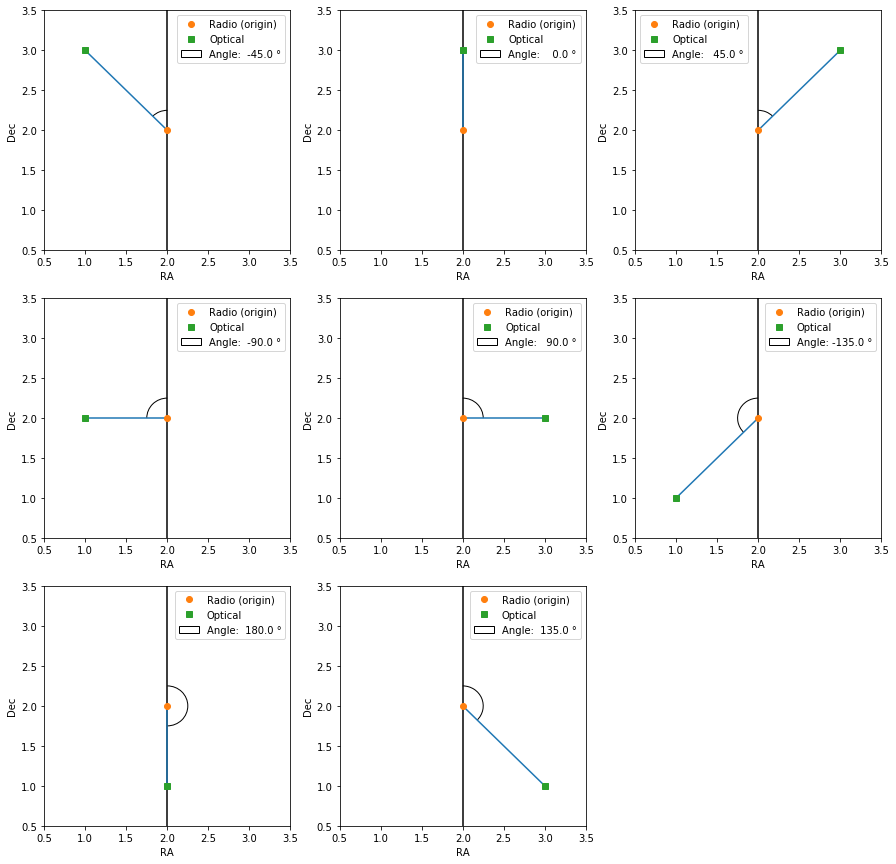

In [11]:
plt.rcParams["figure.figsize"] = (15,15)
n_y = int(len(test_positions)//3)+1
for i, p in enumerate(test_positions):
    pos, angle = p
    plt.subplot(3, 3, i+1)
    plot_phi(*pos)

## Test $\alpha$ angle

This is the angle between the radio major axis and the line joining the radio and the optical sources. 

In [12]:
def get_alpha(phi, pa):
    return phi - pa

In [36]:
test_angles = [
    ((-45, -45), 0),
    ((-45, 0), 45),
    ((-45, -90), -45),
    ((90, 0), -90),
    ((90, 90), 0),
    ((90, 135), 45),
    ((90, 225), 135),
]

In [37]:
for angles, expected in test_angles:
    pa, phi = angles
    print("Computed: {:6.1f} Expected: ~{:6.1f}".format(np.rad2deg(get_alpha(np.deg2rad(phi), np.deg2rad(pa))), expected))

Computed:    0.0 Expected: ~   0.0
Computed:   45.0 Expected: ~  45.0
Computed:  -45.0 Expected: ~ -45.0
Computed:  -90.0 Expected: ~ -90.0
Computed:    0.0 Expected: ~   0.0
Computed:   45.0 Expected: ~  45.0
Computed:  135.0 Expected: ~ 135.0


In [38]:
def plot_alpha(phi, pa, xlim=(-2, 2), ylim=(-2, 2)):
    alpha = get_alpha(np.deg2rad(phi), np.deg2rad(pa))
    alpha = np.rad2deg(alpha)
    plt.vlines(0, -100, 100)
    plt.plot([0, 2*np.sin(np.deg2rad(phi))], [0, 2*np.cos(np.deg2rad(phi))], "-,", 
             label="$\phi$ {:6.1f}".format(phi)) # line phi
    plt.plot([0, 2*np.sin(np.deg2rad(pa))], [0, 2*np.cos(np.deg2rad(pa))], "-,", 
             label="PA {:6.1f}".format(pa)) # line pa
    ax = plt.gca()
    if alpha < 0:
        theta1=0
        theta2=-alpha
    else: 
        theta1=360-alpha
        theta2=360
    a1 = patches.Arc((0, 0), 
                0.5, 
                0.5, 
                angle=90-pa, theta1=theta1, theta2=theta2, 
                color="k",
                label=u"Angle: {:6.1f} \u00b0".format(alpha))
    ax.add_patch(a1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel("RA")
    plt.ylabel("Dec")

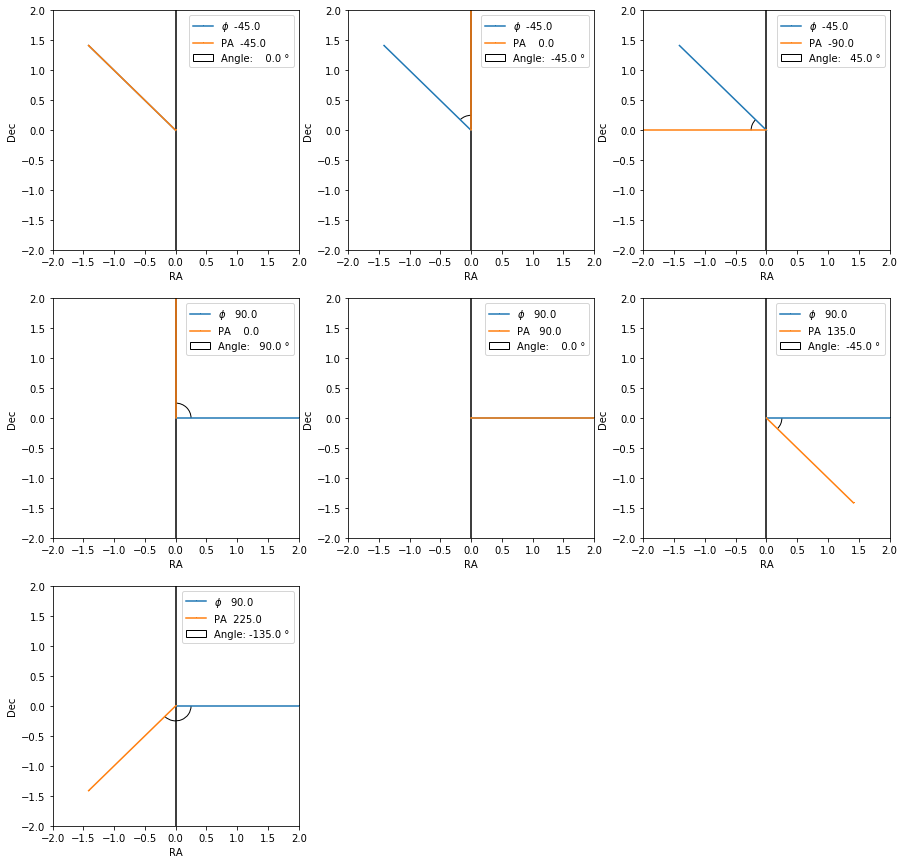

In [39]:
plt.rcParams["figure.figsize"] = (15,15)
n_y = int(len(test_angles)//3)+1
for i, p in enumerate(test_angles):
    angles, _ = p
    plt.subplot(3, 3, i+1)
    plot_alpha(*angles)

## Test rotation of $\Sigma$

Test the rotation of the covariance matrix

In [40]:
def R(theta):
    """Rotation matrix.
    Input:
      - theta: angle in degrees
    """
    theta_rad = np.deg2rad(theta)
    c = np.cos(theta_rad)
    s = np.sin(theta_rad)
    return np.array([[c, -s], [s, c]])

In [41]:
test_sigma_rotation = [
    (([[2,0],[0,0.5]], -45), 1.25),
    (([[2,0],[0,0.5]], 45), 1.25),
    (([[2,0],[0,0.5]], 0), 2),
    (([[2,0],[0,0.5]], -90), 0.5),
    (([[0.5,0],[0,2]], -45), 1.25),
    (([[0.5,0],[0,2]], 45), 1.25),
    (([[0.5,0],[0,2]], 0), 0.5),
    (([[0.5,0],[0,2]], -90), 2),
]

In [43]:
for parameters, expected in test_sigma_rotation:
    Sigma, angle = parameters
    Sigma_rotated = R(angle) @ np.array(Sigma) @ R(angle).T
    print("Computed: {:6.2f} Expected: ~{:6.2f}".format(Sigma_rotated[0,0], expected))

Computed:   1.25 Expected: ~  1.25
Computed:   1.25 Expected: ~  1.25
Computed:   2.00 Expected: ~  2.00
Computed:   0.50 Expected: ~  0.50
Computed:   1.25 Expected: ~  1.25
Computed:   1.25 Expected: ~  1.25
Computed:   0.50 Expected: ~  0.50
Computed:   2.00 Expected: ~  2.00


In [113]:
def plot_rotation(sigma, angle, expected=None, xlim=(-2, 2), ylim=(-2, 2)):
    sigma = np.array(sigma)
    sigma_rotated = R(angle) @ np.array(sigma) @ R(angle).T
    plt.plot([0, 3*np.sin(np.deg2rad(angle))], [0, 3*np.cos(np.deg2rad(angle))], "-,", 
             label="$\phi$ {:6.1f}".format(angle)) # line phi
    if expected is not None:
        plt.plot([0, np.sqrt(expected)/2*np.sin(np.deg2rad(angle))], 
                 [0, np.sqrt(expected)/2*np.cos(np.deg2rad(angle))], "-,", 
                 label="$\phi$ {:6.1f}".format(angle)) # rotated (CHECK)
    ax = plt.gca()
    #print(sigma)
    e1 = patches.Ellipse((0, 0), np.sqrt(sigma[1,1]), np.sqrt(sigma[0,0]),  
                color="k",
                label=u"Angle: {:6.1f} \u00b0".format(angle))
    ax.add_patch(e1)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel("RA")
    plt.ylabel("Dec")

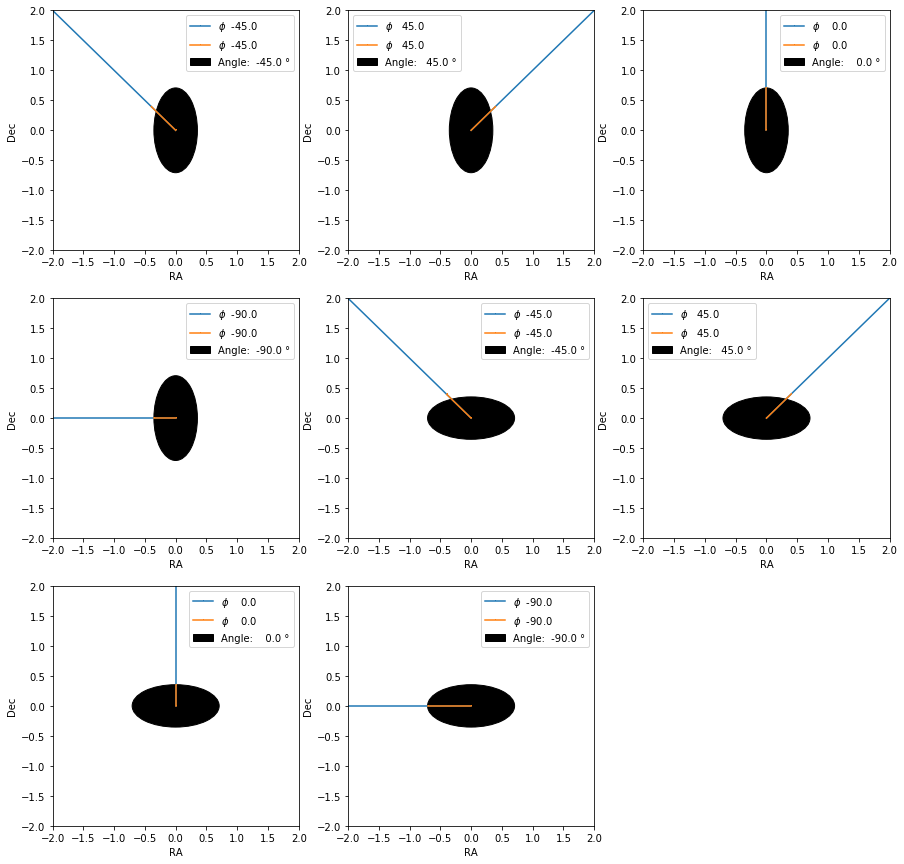

In [114]:
plt.rcParams["figure.figsize"] = (15,15)
n_y = int(len(test_sigma_rotation)//3)+1
for i, p in enumerate(test_sigma_rotation):
    params, expected = p
    sigma, angle = params
    #print(sigma)
    plt.subplot(3, 3, i+1)
    plot_rotation(sigma, angle, expected=expected)

In [98]:
def plot_rotation2(sigma, angle, xlim=(-3, 3), ylim=(-3, 3)):
    sigma = np.array(sigma)
    sigma_rotated = R(angle) @ np.array(sigma) @ R(angle).T
    plt.plot([0, 3*np.sin(np.deg2rad(angle))], [0, 3*np.cos(np.deg2rad(angle))], "-,", 
             label="$\phi$ {:6.1f}".format(angle)) # line phi
    plt.vlines([-1, -0.25, 0.25, 1], -100, 100)
    plt.hlines([-1, -0.25, 0.25, 1], -100, 100)
    ax = plt.gca()
    #print(sigma)
    e1 = patches.Ellipse((0, 0), sigma[1,1], sigma[0,0],  
                color="k", alpha=0.5,
                label=u"Angle: {:6.1f} \u00b0".format(angle))
    ax.add_patch(e1)
    e2 = patches.Ellipse((0, 0), sigma[1,1], sigma[0,0], angle=-angle, 
                color="b", alpha=0.5,
                label=u"Angle: {:6.1f} \u00b0".format(angle))
    ax.add_patch(e2)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel("RA")
    plt.ylabel("Dec")

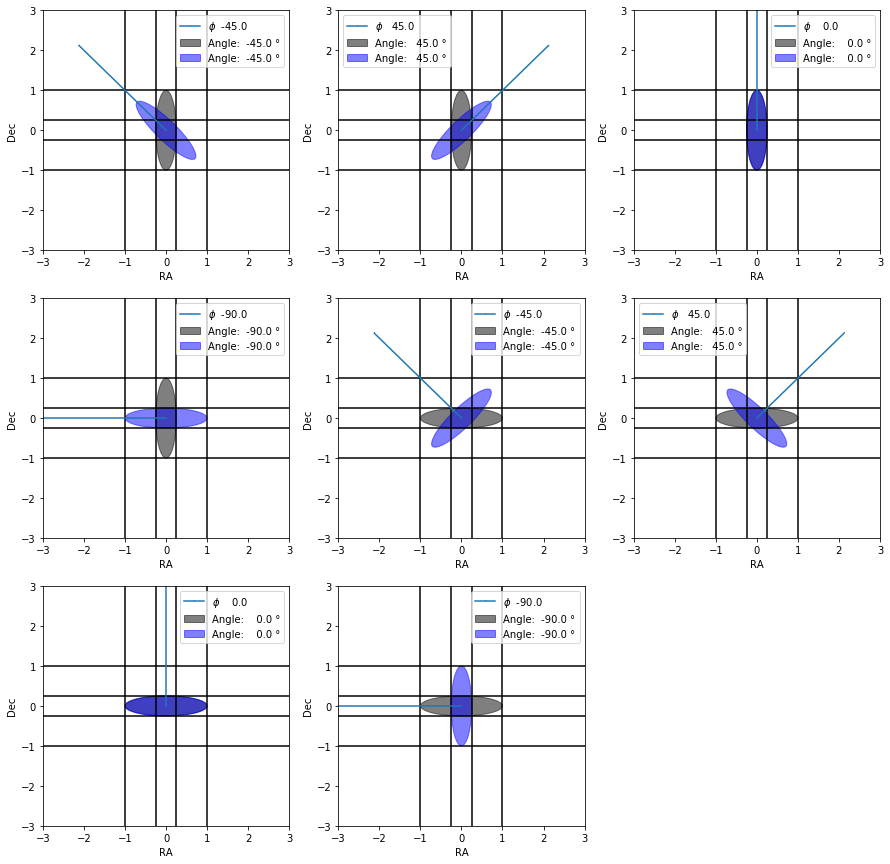

In [99]:
plt.rcParams["figure.figsize"] = (15,15)
n_y = int(len(test_sigma_rotation)//3)+1
for i, p in enumerate(test_sigma_rotation):
    params, expected = p
    sigma, angle = params
    #print(sigma)
    plt.subplot(3, 3, i+1)
    plot_rotation2(sigma, angle)

In [97]:
R(45)@np.array([[2,0],[0,0.5]])@R(45).T

array([[1.25, 0.75],
       [0.75, 1.25]])

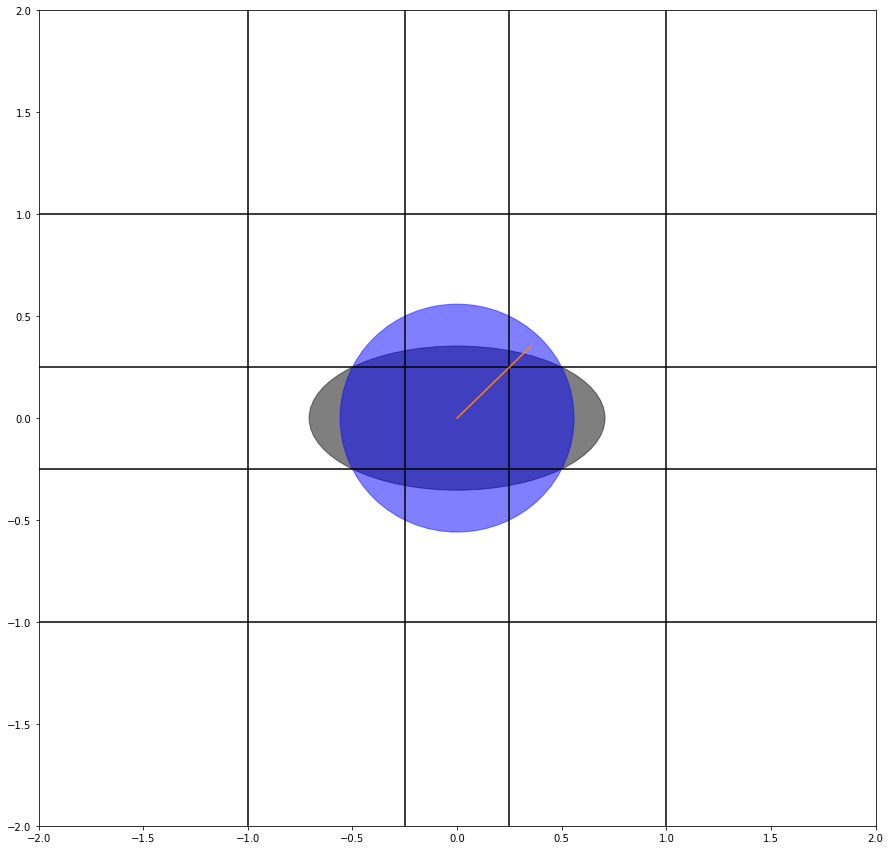

In [123]:
plt.plot([0], [0], "-,")
plt.vlines([-1, -0.25, 0.25, 1], -100, 100)
plt.hlines([-1, -0.25, 0.25, 1], -100, 100)
ax = plt.gca()
e1 = patches.Ellipse((0, 0), np.sqrt(2), np.sqrt(0.5),  
                color="k", alpha=0.5,
                label=u"Angle: {:6.1f} \u00b0".format(angle))
ax.add_patch(e1)
e2 = patches.Ellipse((0, 0), np.sqrt(1.25), np.sqrt(1.25), angle=45, 
                color="b", alpha=0.5,
                label=u"Angle: {:6.1f} \u00b0".format(angle))
ax.add_patch(e2)
plt.plot([0, np.cos(np.deg2rad(45))/2], [0, np.sin(np.deg2rad(45))/2], "-,")
plt.xlim([-2,2])
plt.ylim([-2,2]);

In [115]:
v = np.array([1/np.sqrt(2), 1/np.sqrt(2)])

In [116]:
v @ np.array([[2,0],[0,0.5]]) @ v.T

1.2499999999999998

In [117]:
2/np.sqrt(2)

1.414213562373095

In [118]:
0.5/np.sqrt(2)

0.35355339059327373

In [131]:
angles = np.linspace(0,180,181)
#x0 = np.linspace(-2,2,100)

In [137]:
xu[45]

1.4142135623730951

In [138]:
yu[45]

0.35355339059327373

In [142]:
np.rad2deg(np.arctan2(yu[45], xu[45]))

14.036243467926477

In [132]:
xu = 2*np.cos(np.deg2rad(angles))
xd = -2*np.cos(np.deg2rad(angles))
yu = 0.5*np.sin(np.deg2rad(angles))
yd = -0.5*np.sin(np.deg2rad(angles))

(-2, 2)

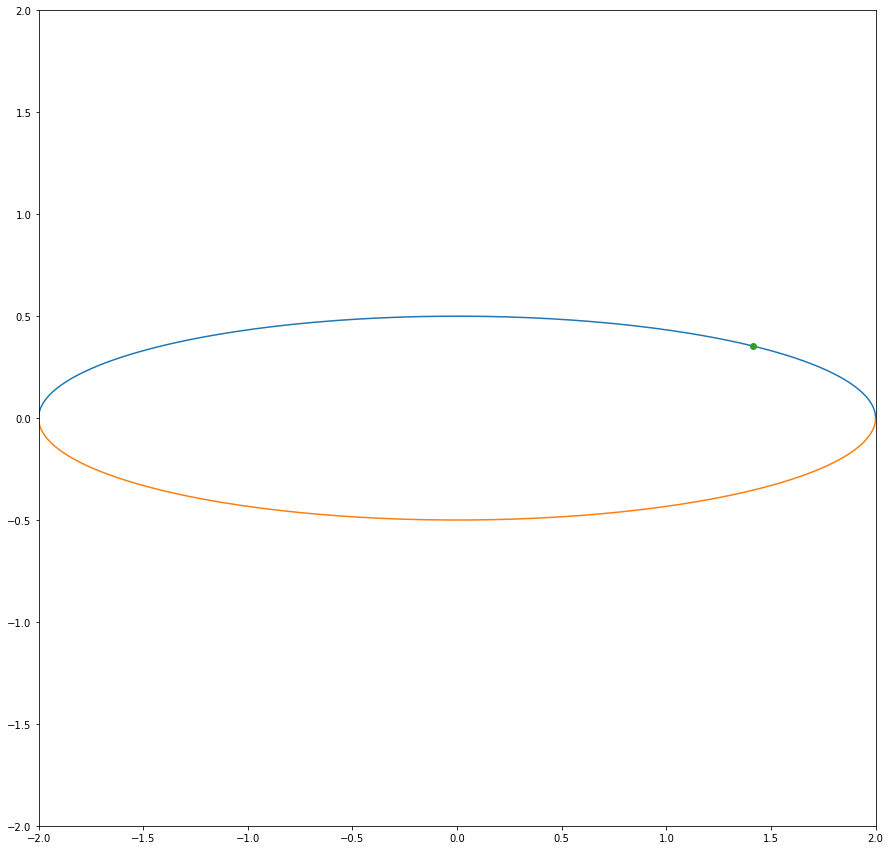

In [140]:
plt.plot(xu,yu)
plt.plot(xd,yd)
plt.plot(xu[45], yu[45], "o")
plt.xlim([-2,2])
plt.ylim([-2,2])